#**Unpickling the Data**

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Mounted at /content/drive
 CNN.ipynb				     'LSTM with Features.ipynb'
 CNN_With_ExtraFeatures.ipynb		     'LSTM with SA.ipynb'
 CNN_With_SA.ipynb			      Models
'Consulting proposal.gslides'		     'Old Notebooks'
'Data Preprocessing.ipynb'		     'Project Wireframes.gslides'
 Datasets				     'Prototyping presentation.gslides'
'Individual Program Brief Template.gslides'  'Spam filter 2.zip'
 LSTM.ipynb				     'Spam Filter.zip'


In [3]:
import pickle
import keras

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

import matplotlib.pyplot as plt

In [4]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

pickle_off_website_tr = open(dataset_dir + "/train_website.pickle","rb")
website_train = pickle.load(pickle_off_website_tr)

pickle_off_website_test = open(dataset_dir + "/test_website.pickle","rb")
website_test = pickle.load(pickle_off_website_test)

pickle_off_ex_train = open(dataset_dir + "/train_ex.pickle","rb")
ex_train = pickle.load(pickle_off_ex_train)

pickle_off_ex_test = open(dataset_dir + "/test_ex.pickle","rb")
ex_test = pickle.load(pickle_off_ex_test)

#**Testing the website feature**

In [5]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    [train_padded, website_train], train_labels, batch_size=32, epochs=epochs_num, validation_data=([test_padded, website_test], test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [9]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 36)(inputA)
x = LSTM(64, dropout=0.4)(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(1, activation="softplus")(combined)
model = Model(inputs=[x.input, inputB], outputs=z)

model.compile(loss='poisson', optimizer="Adamax", metrics=['accuracy'])

Epoch 1/30
149/149 [==============================] - 13s 74ms/step - loss: 0.8014 - accuracy: 0.5838 - val_loss: 0.8472 - val_accuracy: 0.6518
Epoch 2/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5742 - accuracy: 0.9003 - val_loss: 0.6190 - val_accuracy: 0.9445
Epoch 3/30
149/149 [==============================] - 10s 69ms/step - loss: 0.5189 - accuracy: 0.9463 - val_loss: 0.6177 - val_accuracy: 0.9268
Epoch 4/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5013 - accuracy: 0.9651 - val_loss: 0.5990 - val_accuracy: 0.9596
Epoch 5/30
149/149 [==============================] - 10s 70ms/step - loss: 0.4977 - accuracy: 0.9661 - val_loss: 0.5957 - val_accuracy: 0.9630
Epoch 6/30
149/149 [==============================] - 11s 71ms/step - loss: 0.4910 - accuracy: 0.9703 - val_loss: 0.5986 - val_accuracy: 0.9579
Epoch 7/30
149/149 [==============================] - 10s 70ms/step - loss: 0.4878 - accuracy: 0.9748 - val_loss: 0.6035 - val_accuracy:

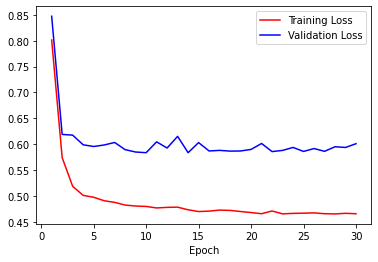

In [10]:
train_and_vizualize_model(model, 30)

In [11]:
score = model.evaluate([test_padded, website_test], test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6011539697647095
Test accuracy: 0.9722455739974976


In [12]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_lstm = open(models_dir + "/LSTM_with_websites.pickle","wb")
pickle.dump(model, pickle_lstm)
pickle_lstm.close()

INFO:tensorflow:Assets written to: ram://2789509e-5a11-4bc2-8499-9d6e66e502f3/assets


INFO:tensorflow:Assets written to: ram://2789509e-5a11-4bc2-8499-9d6e66e502f3/assets


#**Testing the exclamation mark feature**

In [13]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 36)(inputA)
x = LSTM(64, dropout=0.4)(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(1, activation="softplus")(combined)
model = Model(inputs=[x.input, inputB], outputs=z)

model.compile(loss='poisson', optimizer="Adamax", metrics=['accuracy'])

Epoch 1/30
149/149 [==============================] - 14s 80ms/step - loss: 0.8107 - accuracy: 0.5710 - val_loss: 0.8736 - val_accuracy: 0.5694
Epoch 2/30
149/149 [==============================] - 11s 71ms/step - loss: 0.6778 - accuracy: 0.7547 - val_loss: 0.6428 - val_accuracy: 0.9336
Epoch 3/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5384 - accuracy: 0.9314 - val_loss: 0.6222 - val_accuracy: 0.9319
Epoch 4/30
149/149 [==============================] - 11s 71ms/step - loss: 0.5222 - accuracy: 0.9419 - val_loss: 0.6128 - val_accuracy: 0.9487
Epoch 5/30
149/149 [==============================] - 11s 71ms/step - loss: 0.5067 - accuracy: 0.9573 - val_loss: 0.6032 - val_accuracy: 0.9479
Epoch 6/30
149/149 [==============================] - 11s 71ms/step - loss: 0.5002 - accuracy: 0.9598 - val_loss: 0.6238 - val_accuracy: 0.9361
Epoch 7/30
149/149 [==============================] - 11s 71ms/step - loss: 0.4953 - accuracy: 0.9665 - val_loss: 0.5984 - val_accuracy:

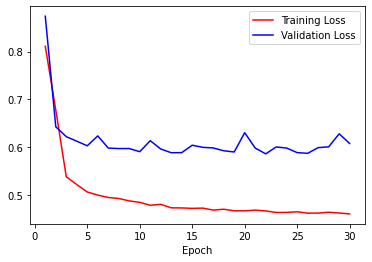

In [14]:
train_and_vizualize_model(model, 30)

In [15]:
score = model.evaluate([test_padded, website_test], test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6080095767974854
Test accuracy: 0.9714045524597168


In [16]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_lstm = open(models_dir + "/LSTM_with_exclamaition.pickle","wb")
pickle.dump(model, pickle_lstm)
pickle_lstm.close()

INFO:tensorflow:Assets written to: ram://4b33ef72-f069-4aee-b6ab-9fbb02b17e7f/assets


INFO:tensorflow:Assets written to: ram://4b33ef72-f069-4aee-b6ab-9fbb02b17e7f/assets
